In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from matplotlib import pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns
import warnings


/kaggle/input/salmon-catch-statistics-for-scotland-19522022/SalmonandSeaTroutNets1952-2022.csv


# Fisheries: Salmon & Sea Trout Analysis

Scottish salmon is the UK's <b>number 1</b> food export and Scotland is a world-famous leisure destination for salmon fishing. 

Salmon are a fascinating, migratory species. The eggs are laid upstream, inland. The fish eggs hatch and then the young fish travel out to sea where they mature over several years. The fish then return from the sea, travelling up the rivers, to their original spawning areas to spawn.

Sea trout are the same species as brown trout. They spawn in freshwater, the only difference is that sea trout have migrated to the sea.

## Objective:

The ficticious aim of this analysis is to provide a health check on the salmon and sea trout populations in Scottish waters. This analysis could then be used to shape recommendations for future policy making. 

-Identify trends with fish stocks from the data given that indicate the current state of the abundance or condition of salmon and sea trout in Scottish waters.


## About the Data:

The data used is a csv file from [Kaggle](/https://www.kaggle.com/datasets/mikhail1681/salmon-catch-statistics-for-scotland-19522022), the data is sourced from the Scottish Government Marine Scotland License: UK Open Government Licence (OGL) website.
It contains data from 1952-2022, each row is a catch report and there are over 23000 rows.


# Inspecting the Dataset

In [2]:
# Open dataset as a pandas dataframe
df=pd.read_csv("/kaggle/input/salmon-catch-statistics-for-scotland-19522022/SalmonandSeaTroutNets1952-2022.csv")

# Make a copy of the dataset to work on, preventing any changes to the original and allowing an easy option to revert back
df1 = df.copy()

In [41]:
#Checking the size of the df, it has 23140 rows and 12 columns
df1.shape

(23140, 12)

In [3]:
# See the first 5 rows 
df1.head()

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
0,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,February,2.0,107.0,400.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,February,2.0,6606.0,24856.9,...,0.0,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,March,3.0,185.0,703.1,...,0.0,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,March,3.0,7008.0,26151.9,...,0.5,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0,31.0
4,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,April,4.0,484.0,1912.3,...,0.0,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0


In [4]:
# See the last 5 rows, in this case the last 3 rows are NaN
df1.tail()

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
23138,Tweed,101.0,1.0,East,Net and Coble: Released,2022.0,September,9.0,2.0,14.7,...,0.0,2.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23139,Ythan,106.0,9.0,North East,Net and Coble: Released,2022.0,August,8.0,1.0,5.0,...,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking the sum of NaN entries in each column
df1.isna().sum()
#Each column has 3 NaN entries, this corresponds with the findings from above. The last 3 rows are blank and no more.

District                  3
District ID               3
Report order              3
Region                    3
Method                    3
Year                      3
Month                     3
Month number              3
Wild MSW number           3
Wild MSW weight (kg)      3
Wild 1SW number           3
Wild 1SW weight (kg)      3
Sea trout number          3
Sea trout weight (kg)     3
Finnock number            3
Finnock weight (kg)       3
Farmed MSW number         3
Farmed MSW weight (kg)    3
Farmed 1SW number         3
Farmed 1SW weight (kg)    3
Netting effort            3
dtype: int64

In [6]:
# Get the column names
df1.columns
# There is some unfamiliar vocab- 'MSW', '1SW', Finnock', this will need to be researched before the next stage
# Not all columns are relevant to this analysis

Index(['District', 'District ID', 'Report order', 'Region', 'Method', 'Year',
       'Month', 'Month number', 'Wild MSW number', 'Wild MSW weight (kg)',
       'Wild 1SW number', 'Wild 1SW weight (kg)', 'Sea trout number',
       'Sea trout weight (kg)', 'Finnock number', 'Finnock weight (kg)',
       'Farmed MSW number', 'Farmed MSW weight (kg)', 'Farmed 1SW number',
       'Farmed 1SW weight (kg)', 'Netting effort'],
      dtype='object')

In [7]:
# Get info on the dataset, identify any missing cells. 
# Taking into account the 3 NaN rows at the tail of df1, the other rows are complete, with a Non-Null Count of 23140 for all columns.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23143 entries, 0 to 23142
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   District                23140 non-null  object 
 1   District ID             23140 non-null  float64
 2   Report order            23140 non-null  float64
 3   Region                  23140 non-null  object 
 4   Method                  23140 non-null  object 
 5   Year                    23140 non-null  float64
 6   Month                   23140 non-null  object 
 7   Month number            23140 non-null  float64
 8   Wild MSW number         23140 non-null  float64
 9   Wild MSW weight (kg)    23140 non-null  float64
 10  Wild 1SW number         23140 non-null  float64
 11  Wild 1SW weight (kg)    23140 non-null  float64
 12  Sea trout number        23140 non-null  float64
 13  Sea trout weight (kg)   23140 non-null  float64
 14  Finnock number          23140 non-null

# Data Cleansing

The dataframe has been inspected, new vocabulary understood and some initial errors identified:

1. The data deals with both wild and farmed fish
2. MSW = Multi sea winter salmon
3. 1SW = One sea winter salmon
4. Finnock = A young sea trout (returning to freshwater after one sea winter, 1SW sea trout)
5. Rows 23140, 23141 and 23142 are NaN
6. Not all columns are relevant to this analysis

Now it is time to cleanse the data by removing incorrect, duplicate and incomplete data in preparation for the analysis.

In [8]:
# Remove last 3 rows (23140, 23141 and 23142) as they are blank cells
df1.drop(df1.tail(3).index, inplace = True)
# Check 
df1.tail()

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
23135,Tweed,101.0,1.0,East,Net and Coble: Released,2022.0,April,4.0,15.0,69.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23136,Tweed,101.0,1.0,East,Net and Coble: Released,2022.0,July,7.0,11.0,53.0,...,40.9,33.0,42.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23137,Tweed,101.0,1.0,East,Net and Coble: Released,2022.0,August,8.0,19.0,95.4,...,76.3,8.0,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23138,Tweed,101.0,1.0,East,Net and Coble: Released,2022.0,September,9.0,2.0,14.7,...,0.0,2.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23139,Ythan,106.0,9.0,North East,Net and Coble: Released,2022.0,August,8.0,1.0,5.0,...,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#initial column drop
df1=df1.drop(columns=['District ID', 'Method', 'Report order', 'Netting effort'])

In [10]:
# Rename the columns to make the names more succint and easier to work with
df1.columns= ['District', 'Region', 'Year', 'Month', 'Month no',
       'Wild MSW no', 'Wild MSW kg', 'Wild 1SW no',
       'Wild 1SW kg', 'ST no', 'ST kg',
       'Finnock no', 'Finnock kg', 'Farmed MSW no',
       'Farmed MSW kg', 'Farmed 1SW no', 'Farmed 1SW kg']
df1.head()

,District,Region,Year,Month,Month no,Wild MSW no,Wild MSW kg,Wild 1SW no,Wild 1SW kg,ST no,ST kg,Finnock no,Finnock kg,Farmed MSW no,Farmed MSW kg,Farmed 1SW no,Farmed 1SW kg
0,Tweed,East,1952.0,February,2.0,107.0,400.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Tweed,East,1952.0,February,2.0,6606.0,24856.9,0.0,0.0,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0
2,Tweed,East,1952.0,March,3.0,185.0,703.1,0.0,0.0,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0
3,Tweed,East,1952.0,March,3.0,7008.0,26151.9,1.0,0.5,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0
4,Tweed,East,1952.0,April,4.0,484.0,1912.3,0.0,0.0,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#Change the type of Year column to integer
df1['Year'] = df1['Year'].astype(int)

In [12]:
#Adding a new column for total Salmon number (both wild and farmed)
df1['Sl total no'] = df1['Wild MSW no'] + df1['Wild 1SW no'] + df1['Farmed MSW no'] + df1['Farmed 1SW no']
#Adding a new column for total Salmon weight (both wild and farmed)
df1['Sl total kg'] =  df1['Wild MSW kg'] + df1['Wild 1SW kg'] + df1['Farmed MSW kg'] + df1['Farmed 1SW kg']


In [13]:
#Adding a new column for total Sea trout number
df1['ST total no'] = df1['ST no'] + df1['Finnock no']
#Adding a new column for Sea trout weight
df1['ST total kg'] = df1['ST kg'] + df1['Finnock kg']
#Adding new columns for combined number and weight
df1['combined total no'] = df1['ST total no'] + df1['Sl total no']
df1['combined total kg'] = df1['ST total kg'] + df1['Sl total kg']
df1['average weight of fish (kg)'] = df1['combined total kg'] / df1['combined total no']


In [14]:
#drop columns that aren't relevant to this study to make processing more efficient
df1 = df1.drop(columns=['Wild MSW no', 'Farmed 1SW no','Wild MSW kg', 'Wild 1SW no', 'Wild 1SW kg', 'ST no', 'ST kg', 'Finnock no', 'Finnock kg', 'Farmed MSW no', 'Farmed MSW kg', 'Farmed 1SW kg'])
#check changes have been applied
df1.head()

,District,Region,Year,Month,Month no,Sl total no,Sl total kg,ST total no,ST total kg,combined total no,combined total kg,average weight of fish (kg)
0,Tweed,East,1952,February,2.0,107.0,400.5,0.0,0.0,107.0,400.5,3.742991
1,Tweed,East,1952,February,2.0,6606.0,24856.9,453.0,705.8,7059.0,25562.7,3.621292
2,Tweed,East,1952,March,3.0,185.0,703.1,13.0,21.3,198.0,724.4,3.658586
3,Tweed,East,1952,March,3.0,7009.0,26152.4,848.0,1172.5,7857.0,27324.9,3.477778
4,Tweed,East,1952,April,4.0,484.0,1912.3,14.0,20.0,498.0,1932.3,3.880120


# Visual Analysis of the Dataset


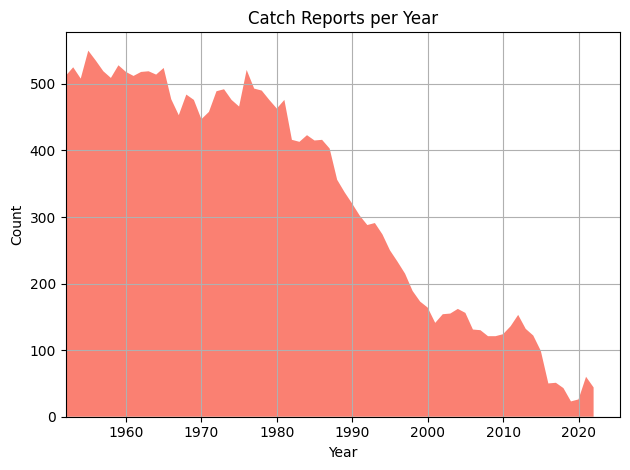

In [28]:
#Create a visualisation to show the number of catch reports per year since 1952, each row is a catch report
rows_per_year = df1.groupby('Year').size().reset_index(name='Number of Rows')

plt.figure()
years = rows_per_year['Year']
rows = rows_per_year['Number of Rows']
plt.stackplot(years, rows, labels=['Number of Rows'], colors=['salmon'])
plt.title('Catch Reports per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.xlim(1952)
plt.ylim(0)
plt.tight_layout()
plt.show()

The stacked area chart above shows the number of catch reports (each row of data) per year from 1952 to 2022. 

This number began to decline in the mind 1960s and in 2022 there were over 90% fewer catch reports. 

It is important to consider that this could be down to changes in reporting methods, such as a streamlining of the administration process.

(0.0, 67713.45)

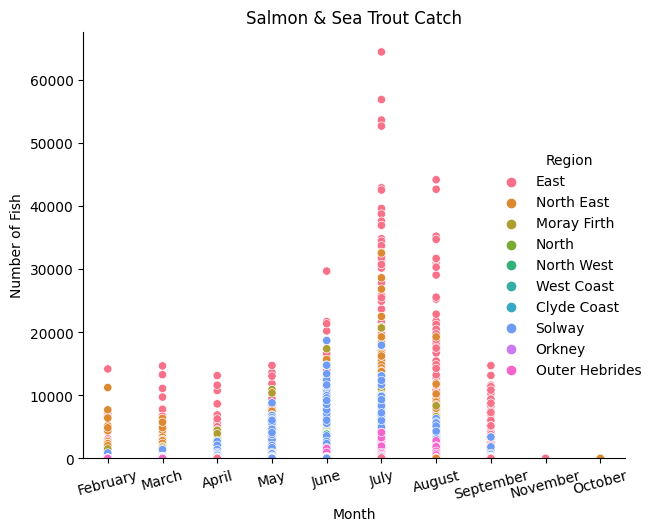

In [57]:
#When are salmon caught? Create a graph to show which months salmon have been caught in different regions.
sns.set_palette("hls")
ax = sns.relplot(data = df1, x='Month', y='combined total no', hue='Region').set(xlabel = 'Month', ylabel = 'Number of Fish')
plt.tight_layout()
plt.xticks(rotation=15)
plt.title('Salmon & Sea Trout Catch')
plt.ylim(0)


The chart above shows the months salmon and sea trout were caught, the quantity of the fish and the region they were caught in.

There is no data for December or January, this is because these months are outside of the salmon fishing season. 

From the chart above we can see that the catch numbers are steady from February to May and then they rapidly increase to the peak in July and August, before declining in September.

Text(0.5, 1.0, 'Salmon & Sea Trout Catch by Number')

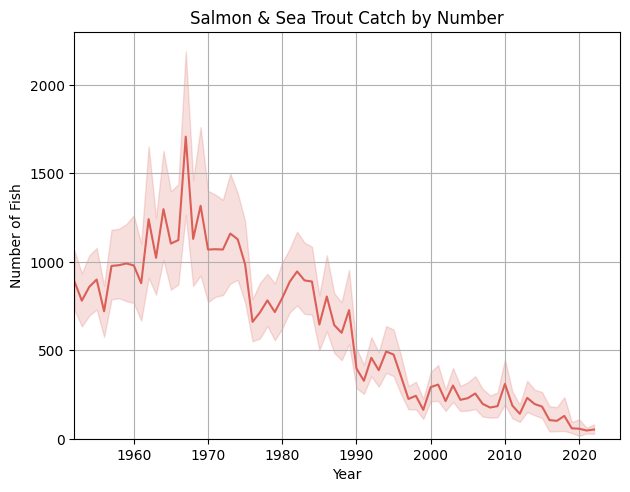

In [58]:
#Create a visual to show how the number of sea trout and salmon caught has changed.

#remove error code
warnings.simplefilter(action='ignore', category=FutureWarning)
#Create a visualisation to show salmon and sea trout landings by number from 1952-2022
plt.figure()
sns.set_palette("hls")
total_chart = sns.lineplot(data=df1, x= 'Year', y= 'combined total no').set(xlabel='Year', ylabel = 'Number of Fish')
plt.xlim(1952)
plt.ylim(0)
plt.grid(True)
plt.tight_layout()
plt.title('Salmon & Sea Trout Catch by Number')

The line chart above shows a strong negative correlation between number of fish per catch report and time. 

Since 1952 the number of fish caught each landing has decreased by over 95%. 

The number peaked in the mid 1960s and has been in rapid decline since. 

It is important to consider that a decrease is fish caught doesn't necessarily indicate an overall decline in population, this could be due to external factors such as a change in method, reporting or the sustainability of fishing practices.

Text(0.5, 1.0, 'Salmon & Sea Trout Landing Weight')

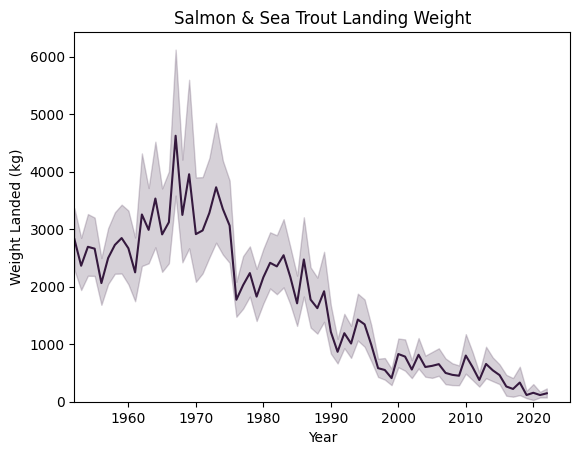

In [62]:
plt.figure()
sns.set_palette("rocket")
total_chart = sns.lineplot(data=df1, x= 'Year', y= 'combined total kg').set(xlabel='Year', ylabel = 'Weight Landed (kg)')
plt.ylim(0)
plt.xlim(1952)
plt.title('Salmon & Sea Trout Landing Weight')

As in the previous visual, the line chart above shows a strong negative correlation between weight of the catch and time. 

The overall weight peaked in the mid 1960s and has been in rapid decline since, just like the number of fish. 

This isn't the best way to look at the data though, it is not possible to make any conclusions about the abundance or condition of salmon and seatrout from the two charts above as they could be impacted by a number of external factors (change in method, reporting protocol, sustainability practices, etc.).

In order to draw conclusions about the condition of salmon caught in Scotland and the state of their population, we need to examine the average weight of individual fish caught. If fish caught are heavier we can assume that they are healthier and thriving than a lighter fish.

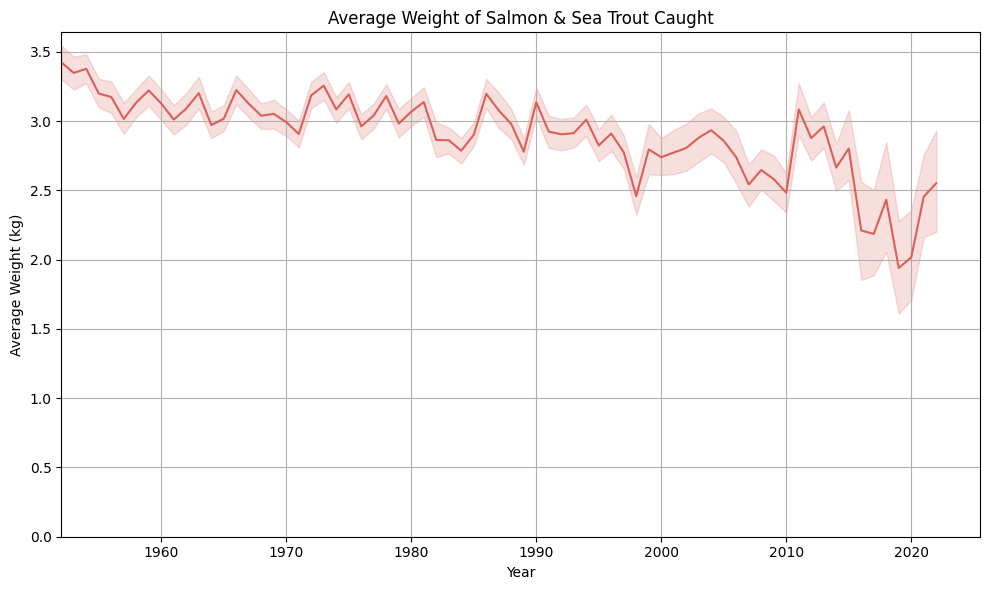

In [80]:
#Create a visual to show how the average weight if salmon and sea trout caught has changed over the time period
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='average weight of fish (kg)', data=df1)
plt.title('Average Weight of Salmon & Sea Trout Caught')
sns.set_palette("flare")
plt.xlabel('Year')
plt.ylabel('Average Weight (kg)')
plt.grid(True)
plt.ylim(0)
plt.xlim(1952)
plt.tight_layout()
plt.show()

The line chart above has been created from a calculation that shows how the average weight of individual salmon and sea trout caught has changed over time.

The average weight has actually <b> decreased </b> by 20% between 1952 and 2021. 

Short-term however, there was a significant increase of 500g between 2018 and 2022.



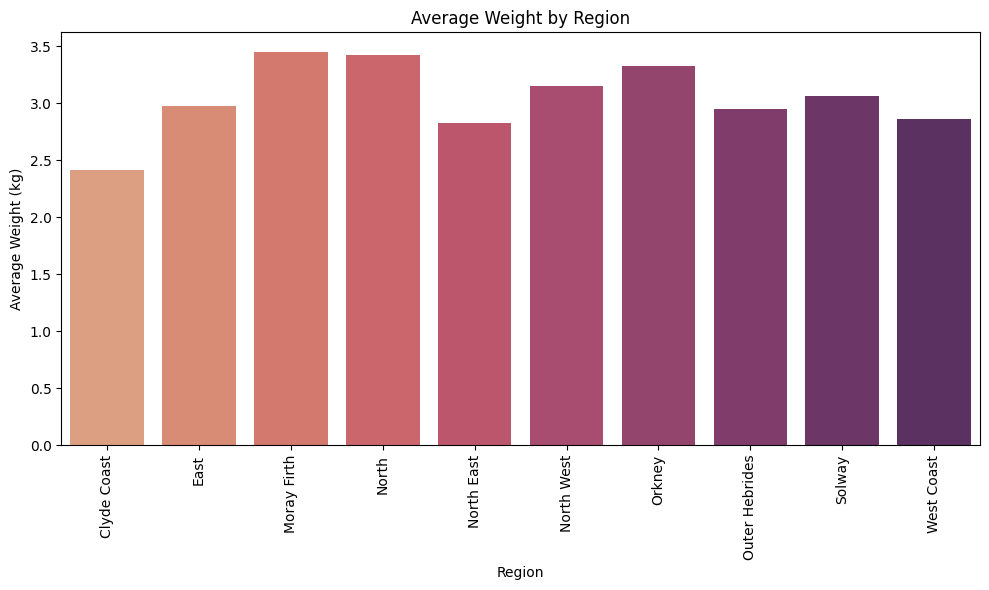

In [84]:
#Plot a chart to show whether this is an overall trend for average weight by region over the timeframe.
average_weight_by_region = df1.groupby('Region')['average weight of fish (kg)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='average weight of fish (kg)', data=average_weight_by_region, palette='flare')
plt.title('Average Weight by Region')
plt.xlabel('Region')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The chart above shows the average fish weight by region over the timeframe

# Conclusion

The number and weight of salmon and sea trout catches has decreased rapidly since the mid 1960s.

-Look into the relationship between location and fish stocks

## Reflection

If I have more time to complete this analysis (hopefully I will in the future), I will look into:

- The difference in average weight between farmed salmon and wild salmon, to see if this could impact the reason for the overall increase in weight.

- The protocol and requirements for submitting catch reports, to more fully understand how this could have impacted the number of catch reports.
